In [10]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pandas as pd

# add precision
%precision 2

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

%matplotlib inline 

In [2]:
# Pregnancy Data
data = pd.read_pickle('nsfg_data.pkl')

In [4]:
# CDC demographic - Body weight
cdc_data = pd.read_pickle('cdc_demographic_2008.pkl')

In [5]:
males = cdc_data[cdc_data.sex == 1 ]
females = cdc_data[cdc_data.sex == 2 ]

In [7]:
# successful pregnacies
live = data[data.outcome == 1]
# full term pregnacies
full_term = live[live.wksgest > 36]
# firstborns
firsts = live[live.birthord == 1] 
# subsequent births
others = live[live.birthord != 1]

In [11]:
males.htm3.mean(), males.htm3.std() 

(178.07, 7.72)

In [12]:
# Ex 5.1
m_norm = stats.norm(loc=males.htm3.mean(), scale=males.htm3.std())


In [13]:
stats.norm.pdf((177.8, 185))

array([ 0.,  0.])

In [16]:
print('The percentage of US adult males \n\
that can apply for the Blue Men Group is \
:  {:.2f}%'.format(100*(m_norm.cdf(185.4) - m_norm.cdf(177.8))))


The percentage of US adult males 
that can apply for the Blue Men Group is :  34.26%


In [17]:
#%% Ex 5.2
hgt_pareto = stats.pareto(b=1.7, scale=1)
hgt_pareto.median(), hgt_pareto.mean()

(1.50, 2.43)

In [18]:
# Under the pareto dist, 
# what fraction of people are shorter than the mean?
hgt_pareto.cdf(hgt_pareto.mean())

0.78

In [20]:
# Out of 7 billion people, 
# how many do we expect to be taller than 1 km?
hgt_pareto.sf(1000)*7e9

55602.98

In [21]:
#%% Ex 5.3
weib = stats.weibull_min(2)
data = weib.rvs(500)
fitPars = stats.weibull_min.fit(data)
fitPars

(2.23, -0.06, 1.08)

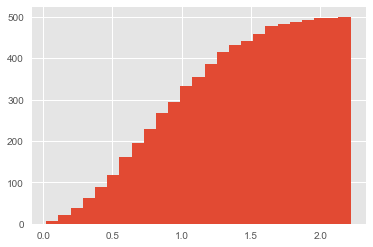

In [38]:
_ = plt.hist(data, bins=25, cumulative=True)#, log=True)

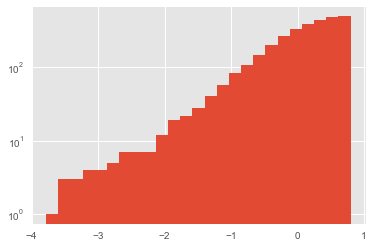

In [37]:
_ = plt.hist( np.log(data), bins=25, cumulative=True, log=True)

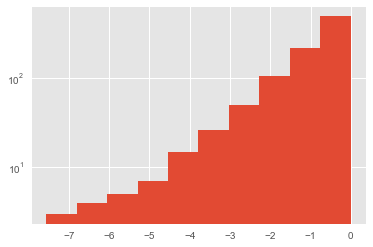

In [36]:
_ = plt.hist(weib.logcdf(data), cumulative=True, log=True)

In [39]:
#%% Ex 5.5
data = pd.read_csv('mystery6.dat', header=None, squeeze=True)
#for i in DISTRIBUTIONS:
#    sns.distplot(data, fit=i)

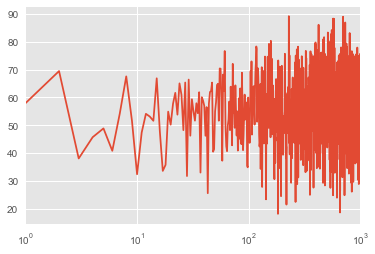

In [40]:
data.plot(logx=True)

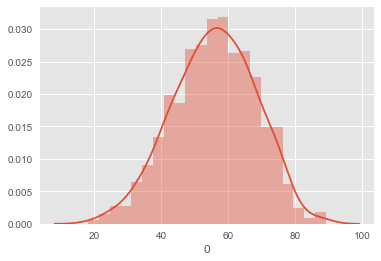

In [41]:
sns.distplot(data)

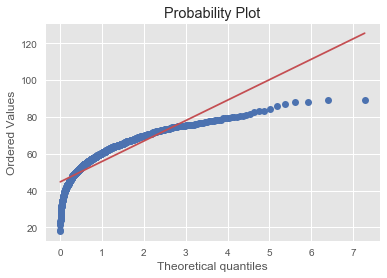

In [42]:
(quantiles, responces), (slope, intercept, r) = stats.probplot(data, dist=stats.weibull_min,sparams=(1,), plot=plt)


In [ ]:
#%% Ex. 5.6
cps = pd.read_csv('hinc06.csv', header=None, skiprows=9, )
# run best_fit_distribution.py for details.